<a href="https://colab.research.google.com/github/crazat/crazat.githurb.io/blob/main/Feature_engineering_%EC%8B%A4%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

- 신용 위험 이진분류 데이터셋 다운로드 받아 구글드라이브에 올리기
    - 학습세트
        - https://drive.google.com/file/d/1YdE8tDjXmRaoXfxdwnwJzSDXhcI--ep3/view?usp=sharing
        - https://drive.google.com/file/d/1FIUBfDmoH9ibWvfsVqcb2DXvm_Hv7OJr/view?usp=sharing
    - 평가세트
        - https://drive.google.com/file/d/16GjeCJS5q-uhp2b5ElUXS0sk88x8gUnK/view?usp=sharing
        - https://drive.google.com/file/d/1Rv1z6Y5S0fvJ04hlrxjuJXUNnyU70ywg/view?usp=sharing

- 구글 드라이브 연결

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


- 데이터 경로 변수

In [ ]:
DATA_PATH = "/content/drive/MyDrive/머신러닝/data/"
DATA_PATH

'/content/drive/MyDrive/머신러닝/data/'

- 데이터 불러오기

In [ ]:
import pandas as pd
import numpy as np

train_customer = pd.read_csv(f"{DATA_PATH}credit_customer_train.csv") # 학습데이터(고객 개인정보)
train_payment = pd.read_csv(f"{DATA_PATH}credit_payment_train.csv") # 학습데이터(고객의 카드값 변제 내역)

test_customer = pd.read_csv(f"{DATA_PATH}credit_customer_test.csv") # 테스트데이터(고객 개인정보)
test_payment = pd.read_csv(f"{DATA_PATH}credit_payment_test.csv") # 테스트데이터(고객의 카드값 변제 내역)
train_customer.shape , train_payment.shape, test_customer.shape , test_payment.shape

((787, 13), (5693, 12), (338, 12), (2557, 12))

- 고객 개인정보 데이터
    - 컬럼명이 비식별화 되어 있음

In [ ]:
train_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 787 entries, 0 to 786
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   고객ID    787 non-null    int64  
 1   범주1     787 non-null    int64  
 2   범주2     787 non-null    int64  
 3   범주3     787 non-null    int64  
 4   범주4     787 non-null    int64  
 5   범주5     787 non-null    int64  
 6   범주6     787 non-null    int64  
 7   수치1     787 non-null    float64
 8   수치2     787 non-null    float64
 9   수치3     787 non-null    int64  
 10  수치4     787 non-null    int64  
 11  수치5     787 non-null    float64
 12  신용위험도   787 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 80.1 KB


In [ ]:
train_customer.head()

,고객ID,범주1,범주2,범주3,범주4,범주5,범주6,수치1,수치2,수치3,수치4,수치5,신용위험도
0,58996294,7,1,2,11,5,3,1239.5,110000.0,80,60064,1.000000,0
1,54988879,4,3,2,8,-1,5,1223.0,68000.0,112,340014,187.082869,0
2,58984937,5,1,2,15,-1,4,1296.5,130000.0,86,60018,158.113883,0
3,58987530,5,1,2,15,5,3,1304.0,146000.0,90,350008,1.000000,0
4,59003965,4,2,2,8,9,4,0.0,76000.0,113,60091,158.407702,0


- 고객의 카드값 변제 내역

In [ ]:
train_payment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5693 entries, 0 to 5692
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   고객ID      5693 non-null   int64  
 1   연체횟수유형1   5693 non-null   int64  
 2   연체횟수유형2   5693 non-null   int64  
 3   연체횟수유형3   5693 non-null   int64  
 4   총연체일수     5693 non-null   int64  
 5   정상결제횟수    5693 non-null   int64  
 6   카드코드      5693 non-null   int64  
 7   카드한도      1486 non-null   float64
 8   계정업데이트날짜  5676 non-null   object 
 9   카드현재잔액    5693 non-null   float64
 10  카드최고잔액    5415 non-null   float64
 11  최근지불날짜    4959 non-null   object 
dtypes: float64(3), int64(7), object(2)
memory usage: 533.8+ KB


In [ ]:
train_payment.head()

/usr/local/lib/python3.11/dist-packages/google/colab/_dataframe_summarizer.py:88: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  cast_date_col = pd.to_datetime(column, errors="coerce")


,고객ID,연체횟수유형1,연체횟수유형2,연체횟수유형3,총연체일수,정상결제횟수,카드코드,카드한도,계정업데이트날짜,카드현재잔액,카드최고잔액,최근지불날짜
0,58987402,0,0,0,0,1,10,16500.0,04/12/2016,0.0,NaN,NaN
1,58995151,0,0,0,0,1,5,NaN,04/12/2016,588720.0,491100.0,NaN
2,58997200,0,0,0,0,2,5,NaN,04/12/2016,840000.0,700500.0,22/04/2016
3,54987763,0,0,0,0,2,10,NaN,03/12/2016,15147.6,NaN,26/04/2016
4,58994429,0,0,0,0,2,10,16500.0,02/12/2016,3252.0,3210.0,NaN


- 고객별 카드값 변제 내역이 있음

In [ ]:
train_payment.sort_values(by="고객ID").head(50)

,고객ID,연체횟수유형1,연체횟수유형2,연체횟수유형3,총연체일수,정상결제횟수,카드코드,카드한도,계정업데이트날짜,카드현재잔액,카드최고잔액,최근지불날짜
5389,54982353,1,2,3,562,13,10,NaN,22/04/2005,0.0,5831.0,07/10/2005
4970,54982353,0,0,0,0,5,10,NaN,12/03/2007,0.0,NaN,NaN
1848,54982353,0,0,0,0,1,10,55000.0,27/08/2014,0.0,2068.0,12/06/2014
4971,54982353,0,0,0,0,12,10,NaN,12/03/2007,120381.6,546657.0,21/05/2011
5540,54982353,0,0,0,0,4,10,NaN,17/09/2003,0.0,4458.0,28/03/2006
5580,54982353,0,0,0,0,35,10,5500.0,05/01/2003,0.0,4043.0,25/11/2003
5059,54982353,0,0,0,0,1,10,NaN,21/11/2006,0.0,NaN,NaN
5534,54982353,0,0,0,0,34,10,NaN,17/10/2003,0.0,5610.0,28/05/2005
2662,54982353,1,0,0,1,31,10,550000.0,03/09/2013,326684.4,609683.0,18/12/2015
5623,54982353,0,0,0,0,11,2,NaN,21/02/2001,0.0,248874.0,22/06/2007


# Feature Extraction
- 주어진 데이터에서 머신러닝 모델이 학습 및 예측에서 사용할 특성변수(Features)를 추출하는 과정​
- 원본 특성들을 조합하거나 집계 등을 하여 새로운 특성을 생성

In [ ]:
train_payment.head()

/usr/local/lib/python3.11/dist-packages/google/colab/_dataframe_summarizer.py:88: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  cast_date_col = pd.to_datetime(column, errors="coerce")


,고객ID,연체횟수유형1,연체횟수유형2,연체횟수유형3,총연체일수,정상결제횟수,카드코드,카드한도,계정업데이트날짜,카드현재잔액,카드최고잔액,최근지불날짜
0,58987402,0,0,0,0,1,10,16500.0,04/12/2016,0.0,NaN,NaN
1,58995151,0,0,0,0,1,5,NaN,04/12/2016,588720.0,491100.0,NaN
2,58997200,0,0,0,0,2,5,NaN,04/12/2016,840000.0,700500.0,22/04/2016
3,54987763,0,0,0,0,2,10,NaN,03/12/2016,15147.6,NaN,26/04/2016
4,58994429,0,0,0,0,2,10,16500.0,02/12/2016,3252.0,3210.0,NaN


## 하나의 샘플이 여러 개의 행으로 구성된 데이터 집계하여 피쳐생성

In [ ]:
agg_dict = {"연체횟수유형1":"sum"}
# 집계 > 컬럼명변경 > groupby 기준컬럼 컬럼데이터로 변경
tmp = train_payment.groupby("고객ID").agg(agg_dict).add_suffix("_sum").reset_index()
tmp

,고객ID,연체횟수유형1_sum
0,54982353,3
1,54982356,0
2,54982387,3
3,54982463,0
4,54982530,0
...,...,...
782,59005917,0
783,59005995,0
784,59006193,0
785,59006219,1


In [ ]:
# 추출한 피쳐 merge
pd.merge(train_customer,tmp,how="left",on="고객ID")

,고객ID,범주1,범주2,범주3,범주4,범주5,범주6,수치1,수치2,수치3,수치4,수치5,신용위험도,연체횟수유형1_sum
0,58996294,7,1,2,11,5,3,1239.5,110000.0,80,60064,1.000000,0,0
1,54988879,4,3,2,8,-1,5,1223.0,68000.0,112,340014,187.082869,0,0
2,58984937,5,1,2,15,-1,4,1296.5,130000.0,86,60018,158.113883,0,0
3,58987530,5,1,2,15,5,3,1304.0,146000.0,90,350008,1.000000,0,1
4,59003965,4,2,2,8,9,4,0.0,76000.0,113,60091,158.407702,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
782,58994117,7,1,2,11,5,3,1323.5,122000.0,86,151300,1.000000,0,1
783,58995289,7,2,2,11,5,4,0.0,50000.0,113,450080,167.564913,0,1
784,58996500,7,1,2,11,9,5,1328.0,189000.0,85,60019,1.000000,0,0
785,59001833,4,3,2,8,9,4,1250.0,95000.0,111,60047,1.000000,0,0


- 각 컬럼별로 다양하게 집계하면서 컬럼명도 지정할 수 있다.

In [ ]:
agg_dict = {
    # key: 집계대상컬럼
    # value: 변경할 컬럼명과 집계문자열/함수를 튜플에 담고 리스트에 넣으면 된다.
    "연체횟수유형1": [
        ("연체횟수유형1_sum","sum"),
        ("변제횟수","count") # 카운팅하여 변제횟수 피쳐 생성
    ],
    "연체횟수유형2": [
        ("연체횟수유형2_sum","sum")
    ],
    "연체횟수유형3": [
        ("연체횟수유형3_sum","sum")
    ],
    "총연체일수": [
        ("총연체일수_sum","sum")
    ],
    "정상결제횟수": [
        ("정상결제횟수_sum","sum"),
        ("정상결제횟수_mean","mean"),
        ("정상결제횟수_std","std"),
    ],
    "카드코드": [
        ("카드코드_nunique","nunique"),
    ],
    "카드한도": [
        ("카드한도_mean","mean"),
        ("카드한도_std","std"),
    ],
    "카드현재잔액": [
        ("카드현재잔액_mean","mean"),
        ("카드현재잔액_std","std"),
    ],
    "카드최고잔액": [
        ("카드최고잔액_mean","mean"),
        ("카드최고잔액_std","std"),
    ],
}
tmp = train_payment.groupby("고객ID").agg(agg_dict)
tmp # 멀티 컬럼이 생성됨

연체횟수유형1          연체횟수유형2     연체횟수유형3     총연체일수     정상결제횟수  \
         연체횟수유형1_sum 변제횟수 연체횟수유형2_sum 연체횟수유형3_sum 총연체일수_sum 정상결제횟수_sum   
고객ID                                                                     
54982353           3   18           2          38     32078        229   
54982356           0    7           0           0         0        117   
54982387           3   11           0           0        12        246   
54982463           0    2           0           0         0         34   
54982530           0    4           0           0         0         56   
...              ...  ...         ...         ...       ...        ...   
59005917           0    2           0           0         0         17   
59005995           0    3           0           0         0         49   
59006193           0    8           0           0         0        106   
59006219           1    3           0           0        28         81   
59006239           0    3           0           0         0         32   

                                        카드코드      카드한도                 \
         정상결제횟수_mean 정상결제횟수_std 카드코드_nunique 카드한도_mean       카드한도_std   
고객ID                                                                    
54982353   12.722222  13.654586            3  259600.0  287253.790227   
54982356   16.714286  14.817943            4  330000.0            NaN   
54982387   22.363636  10.846868            3  109450.0  148890.597420   
54982463   17.000000   2.828427            2       NaN            NaN   
54982530   14.000000   7.702813            1   94600.0   56002.857070   
...              ...        ...          ...       ...            ...   
59005917    8.500000   6.363961            1  105600.0            NaN   
59005995   16.333333  11.590226            2   35200.0   10889.444430   
59006193   13.250000  11.360961            2  105160.0   31725.037431   
59006219   27.000000  14.730920            2   33000.0            NaN   
59006239   10.666667   9.073772            2   15400.0            NaN   

                 카드현재잔액                        카드최고잔액                 
            카드현재잔액_mean     카드현재잔액_std    카드최고잔액_mean     카드최고잔액_std  
고객ID                                                                  
54982353   42033.133333   95414.365020  246583.714286  294232.061830  
54982356    2277.771429    6023.771407  196649.285714  276735.785384  
54982387  117455.127273  285177.439067  238270.000000  367205.535992  
54982463   39890.400000   56413.544688   78500.000000   31112.698372  
54982530    1261.200000    2097.743473   12787.750000    8833.717201  
...                 ...            ...            ...            ...  
59005917    7432.200000    6548.091636   18773.500000    5701.401977  
59005995   57099.600000   51136.985727  105173.666667  126020.724606  
59006193   13651.350000   30201.805753   50328.625000   24775.431551  
59006219  179909.200000  301856.158793  189248.666667  269777.221797  
59006239     830.800000    1438.987811   16780.333333    3734.477250  

[787 rows x 15 columns]

In [ ]:
# 멀티컬럼 제거하고 고객ID 컬럼데이터로 만들기
tmp.columns = tmp.columns.droplevel() # 기본으로 0레벨 컬럼 제거해서 반환
tmp = tmp.reset_index()  # 고객ID 컬럼데이터로 만들기
tmp

,고객ID,연체횟수유형1_sum,변제횟수,연체횟수유형2_sum,연체횟수유형3_sum,총연체일수_sum,정상결제횟수_sum,정상결제횟수_mean,정상결제횟수_std,카드코드_nunique,카드한도_mean,카드한도_std,카드현재잔액_mean,카드현재잔액_std,카드최고잔액_mean,카드최고잔액_std
0,54982353,3,18,2,38,32078,229,12.722222,13.654586,3,259600.0,287253.790227,42033.133333,95414.365020,246583.714286,294232.061830
1,54982356,0,7,0,0,0,117,16.714286,14.817943,4,330000.0,NaN,2277.771429,6023.771407,196649.285714,276735.785384
2,54982387,3,11,0,0,12,246,22.363636,10.846868,3,109450.0,148890.597420,117455.127273,285177.439067,238270.000000,367205.535992
3,54982463,0,2,0,0,0,34,17.000000,2.828427,2,NaN,NaN,39890.400000,56413.544688,78500.000000,31112.698372
4,54982530,0,4,0,0,0,56,14.000000,7.702813,1,94600.0,56002.857070,1261.200000,2097.743473,12787.750000,8833.717201
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
782,59005917,0,2,0,0,0,17,8.500000,6.363961,1,105600.0,NaN,7432.200000,6548.091636,18773.500000,5701.401977
783,59005995,0,3,0,0,0,49,16.333333,11.590226,2,35200.0,10889.444430,57099.600000,51136.985727,105173.666667,126020.724606
784,59006193,0,8,0,0,0,106,13.250000,11.360961,2,105160.0,31725.037431,13651.350000,30201.805753,50328.625000,24775.431551
785,59006219,1,3,0,0,28,81,27.000000,14.730920,2,33000.0,NaN,179909.200000,301856.158793,189248.666667,269777.221797


In [ ]:
# 추출한 피쳐 merge
train_ft = pd.merge(train_customer,tmp,how="left",on="고객ID")
train_ft

,고객ID,범주1,범주2,범주3,범주4,범주5,범주6,수치1,수치2,수치3,...,정상결제횟수_sum,정상결제횟수_mean,정상결제횟수_std,카드코드_nunique,카드한도_mean,카드한도_std,카드현재잔액_mean,카드현재잔액_std,카드최고잔액_mean,카드최고잔액_std
0,58996294,7,1,2,11,5,3,1239.5,110000.0,80,...,26,6.500000,6.454972,2,107800.000000,NaN,341837.40,382976.993952,253341.750000,250922.387985
1,54988879,4,3,2,8,-1,5,1223.0,68000.0,112,...,38,12.666667,6.027714,2,74250.000000,11667.261890,19739.60,22504.881401,36681.666667,14667.393509
2,58984937,5,1,2,15,-1,4,1296.5,130000.0,86,...,79,15.800000,13.386560,2,16500.000000,NaN,29227.68,62191.709155,50258.600000,90255.710081
3,58987530,5,1,2,15,5,3,1304.0,146000.0,90,...,149,14.900000,15.444884,2,44805.514286,46327.898604,2053.68,4547.761408,37493.888889,23725.174038
4,59003965,4,2,2,8,9,4,0.0,76000.0,113,...,44,14.666667,11.239810,1,89100.000000,32668.333291,161.20,288.610187,19747.333333,13688.020030
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
782,58994117,7,1,2,11,5,3,1323.5,122000.0,86,...,75,15.000000,13.114877,3,11000.000000,NaN,55607.52,101873.752743,104254.600000,110592.850324
783,58995289,7,2,2,11,5,4,0.0,50000.0,113,...,182,16.545455,13.582074,5,54450.000000,11378.488476,37244.40,47531.921644,55939.272727,35578.302720
784,58996500,7,1,2,11,9,5,1328.0,189000.0,85,...,36,18.000000,1.414214,1,99000.000000,85559.920524,18006.60,25465.177932,55935.500000,76809.474106
785,59001833,4,3,2,8,9,4,1250.0,95000.0,111,...,42,14.000000,7.549834,2,57200.000000,NaN,10548.80,18271.057559,33011.666667,18617.945814


- 테스트 데이터도 동일한 방식으로 피쳐 추가

In [ ]:
test_payment.head()

,고객ID,연체횟수유형1,연체횟수유형2,연체횟수유형3,총연체일수,정상결제횟수,카드코드,카드한도,계정업데이트날짜,카드현재잔액,카드최고잔액,최근지불날짜
0,54988608,0,0,0,0,3,10,37400.0,03/12/2016,8425.2,7520.0,25/04/2016
1,59004828,0,0,0,0,3,10,88000.0,02/12/2016,3196.8,6193.0,15/04/2016
2,58993672,0,0,0,0,3,10,16500.0,01/12/2016,3487.2,3406.0,15/02/2016
3,54991294,0,0,0,0,1,0,NaN,04/11/2016,2617.2,2681.0,NaN
4,54987489,0,0,0,0,1,10,NaN,04/11/2016,0.0,NaN,NaN


In [ ]:
tmp = test_payment.groupby("고객ID").agg(agg_dict) # 동일한 방식으로 집계
tmp.columns = tmp.columns.droplevel() # 기본으로 0레벨 컬럼 제거해서 반환
tmp = tmp.reset_index()  # 고객ID 컬럼데이터로 만들기
test_ft = pd.merge(test_customer,tmp,how="left",on="고객ID")
test_ft

,고객ID,범주1,범주2,범주3,범주4,범주5,범주6,수치1,수치2,수치3,...,정상결제횟수_sum,정상결제횟수_mean,정상결제횟수_std,카드코드_nunique,카드한도_mean,카드한도_std,카드현재잔액_mean,카드현재잔액_std,카드최고잔액_mean,카드최고잔액_std
0,58991594,7,3,1,11,5,5,1365.5,152000.0,84,...,117,16.714286,13.816829,4,120450.000000,145451.864890,237269.485714,388585.126964,250155.428571,391407.849007
1,54983822,5,3,2,15,5,4,0.0,94000.0,113,...,110,22.000000,7.000000,2,57200.000000,NaN,2450.640000,5487.179630,36809.600000,12823.881737
2,54984131,5,3,2,15,5,5,1244.0,57000.0,95,...,115,19.166667,8.704405,2,66366.666667,16838.745005,39169.000000,30712.634008,48969.666667,11405.139625
3,58994981,7,2,2,11,5,3,0.0,72000.0,109,...,30,15.000000,5.656854,1,NaN,NaN,19324.800000,27329.394250,48771.000000,54119.124605
4,59004856,4,2,2,8,5,3,0.0,99000.0,90,...,33,16.500000,13.435029,1,82500.000000,NaN,19231.800000,27369.275073,23714.500000,27969.608730
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
333,58992009,7,3,2,11,9,3,1290.5,273000.0,113,...,71,17.750000,4.349329,4,NaN,NaN,336236.100000,498550.920926,453426.250000,394427.443800
334,58993131,7,2,2,11,5,5,0.0,120000.0,101,...,91,8.272727,10.179302,4,NaN,NaN,3895.636364,12920.364138,47434.363636,26212.971881
335,58993847,7,3,2,11,9,4,1262.0,172000.0,112,...,45,9.000000,8.276473,2,NaN,NaN,115285.440000,256848.631635,142382.800000,209631.629167
336,58995703,7,3,2,11,9,5,0.0,75000.0,100,...,230,19.166667,10.878113,4,82500.000000,0.000000,353.600000,714.121334,126724.500000,200504.087986


## 특성들을 파악하여 조합을 통해 새로운 특성을 생성

- 총연체일수의 총합에 대한 변제횟수의 비율을 피쳐로 추가하기




In [ ]:
train_ft["변제횟수_총연체일수_sum"] = train_ft["변제횟수"] / (train_ft["총연체일수_sum"] + 1e-05) # 아주 작은 수를 더해 division by zero 방지
train_ft

,고객ID,범주1,범주2,범주3,범주4,범주5,범주6,수치1,수치2,수치3,...,정상결제횟수_mean,정상결제횟수_std,카드코드_nunique,카드한도_mean,카드한도_std,카드현재잔액_mean,카드현재잔액_std,카드최고잔액_mean,카드최고잔액_std,변제횟수_총연체일수_sum
0,58996294,7,1,2,11,5,3,1239.5,110000.0,80,...,6.500000,6.454972,2,107800.000000,NaN,341837.40,382976.993952,253341.750000,250922.387985,400000.000000
1,54988879,4,3,2,8,-1,5,1223.0,68000.0,112,...,12.666667,6.027714,2,74250.000000,11667.261890,19739.60,22504.881401,36681.666667,14667.393509,300000.000000
2,58984937,5,1,2,15,-1,4,1296.5,130000.0,86,...,15.800000,13.386560,2,16500.000000,NaN,29227.68,62191.709155,50258.600000,90255.710081,500000.000000
3,58987530,5,1,2,15,5,3,1304.0,146000.0,90,...,14.900000,15.444884,2,44805.514286,46327.898604,2053.68,4547.761408,37493.888889,23725.174038,0.015873
4,59003965,4,2,2,8,9,4,0.0,76000.0,113,...,14.666667,11.239810,1,89100.000000,32668.333291,161.20,288.610187,19747.333333,13688.020030,300000.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
782,58994117,7,1,2,11,5,3,1323.5,122000.0,86,...,15.000000,13.114877,3,11000.000000,NaN,55607.52,101873.752743,104254.600000,110592.850324,0.012788
783,58995289,7,2,2,11,5,4,0.0,50000.0,113,...,16.545455,13.582074,5,54450.000000,11378.488476,37244.40,47531.921644,55939.272727,35578.302720,0.392857
784,58996500,7,1,2,11,9,5,1328.0,189000.0,85,...,18.000000,1.414214,1,99000.000000,85559.920524,18006.60,25465.177932,55935.500000,76809.474106,200000.000000
785,59001833,4,3,2,8,9,4,1250.0,95000.0,111,...,14.000000,7.549834,2,57200.000000,NaN,10548.80,18271.057559,33011.666667,18617.945814,300000.000000


In [ ]:
# 테스트 데이터 동일하게 추가
test_ft["변제횟수_총연체일수_sum"] = test_ft["변제횟수"] / (test_ft["총연체일수_sum"] + 1e-05) # 아주 작은 수를 더해 division by zero 방지

- 타겟값을 target 변수에 저장

In [ ]:
target = train_ft["신용위험도"]
target.mean()

0.19949174078780177

- 고객ID 및 신용위험도 컬럼 제거

In [ ]:
train_ft = train_ft.drop(columns=["고객ID","신용위험도"])
test_ft = test_ft.drop(columns=["고객ID"])
train_ft.shape , test_ft.shape

((787, 27), (338, 27))

# 결측치 처리

- 결측치 확인

In [ ]:
train_ft.isnull().sum()

,0
범주1,0
범주2,0
범주3,0
범주4,0
범주5,0
범주6,0
수치1,0
수치2,0
수치3,0
수치4,0


In [ ]:
test_ft.isnull().sum()

,0
범주1,0
범주2,0
범주3,0
범주4,0
범주5,0
범주6,0
수치1,0
수치2,0
수치3,0
수치4,0


## pandas를 이용한 방법

- 컬럼 개수가 맞으면 여러 컬럼을 동시에 처리할 수 있다.

In [ ]:
cols = ["정상결제횟수_std","카드한도_mean","카드한도_std","카드현재잔액_std","카드최고잔액_std"] # 결측치가 있는 컬럼
mean_series = train_ft[cols].mean() # 컬럼별 평균 값이 시리즈 형태로 반환
train_ft[cols].fillna(mean_series)

,정상결제횟수_std,카드한도_mean,카드한도_std,카드현재잔액_std,카드최고잔액_std
0,6.454972,107800.000000,47539.969728,382976.993952,250922.387985
1,6.027714,74250.000000,11667.261890,22504.881401,14667.393509
2,13.386560,16500.000000,47539.969728,62191.709155,90255.710081
3,15.444884,44805.514286,46327.898604,4547.761408,23725.174038
4,11.239810,89100.000000,32668.333291,288.610187,13688.020030
...,...,...,...,...,...
782,13.114877,11000.000000,47539.969728,101873.752743,110592.850324
783,13.582074,54450.000000,11378.488476,47531.921644,35578.302720
784,1.414214,99000.000000,85559.920524,25465.177932,76809.474106
785,7.549834,57200.000000,47539.969728,18271.057559,18617.945814


- 테스트 데이터도 학습데이터에서 추출한 동일한 통계치로 처리해야한다.

In [ ]:
test_ft[cols].fillna(mean_series)

,정상결제횟수_std,카드한도_mean,카드한도_std,카드현재잔액_std,카드최고잔액_std
0,13.816829,120450.000000,145451.864890,388585.126964,391407.849007
1,7.000000,57200.000000,47539.969728,5487.179630,12823.881737
2,8.704405,66366.666667,16838.745005,30712.634008,11405.139625
3,5.656854,81664.146523,47539.969728,27329.394250,54119.124605
4,13.435029,82500.000000,47539.969728,27369.275073,27969.608730
...,...,...,...,...,...
333,4.349329,81664.146523,47539.969728,498550.920926,394427.443800
334,10.179302,81664.146523,47539.969728,12920.364138,26212.971881
335,8.276473,81664.146523,47539.969728,256848.631635,209631.629167
336,10.878113,82500.000000,0.000000,714.121334,200504.087986


## sklearn의 impute 모듈을 이용한 방법
- SimpleImputer 클래스 주요 파라미터
    - strategy
        - "mean" : 평균
        - "median" : 중앙값
        - "most_frequent" : 최빈값
        - "constant" : fill_value 파라미터에 지정된 값
    - fill_value
        - 지정한 값으로 채우고 싶을 경우


In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="mean")
tmp = imputer.fit_transform(train_ft[cols])  # 하나의 컬럼을 넣더라도 2D 형식으로 넣어줘야한다. 반환은 ndarray 형태로 반환됨
tmp

array([[6.45497224e+00, 1.07800000e+05, 4.75399697e+04, 3.82976994e+05,
        2.50922388e+05],
       [6.02771377e+00, 7.42500000e+04, 1.16672619e+04, 2.25048814e+04,
        1.46673935e+04],
       [1.33865604e+01, 1.65000000e+04, 4.75399697e+04, 6.21917092e+04,
        9.02557101e+04],
       ...,
       [1.41421356e+00, 9.90000000e+04, 8.55599205e+04, 2.54651779e+04,
        7.68094741e+04],
       [7.54983444e+00, 5.72000000e+04, 4.75399697e+04, 1.82710576e+04,
        1.86179458e+04],
       [6.36396103e+00, 1.05600000e+05, 4.75399697e+04, 6.54809164e+03,
        5.70140198e+03]])

## 머신러닝 모델을 이용하여 결측치 채우기
- 결측치가 아닌 다른 변수들을 이용하여 결측치를 추정
- 주변에 결측치가 아닌 값들을 이용해서 결측치를 예측하여 채우는 방식
- 실험 단계에 있기때문에 많이 변경 될 예정(이런게 있다 정도로만 알아두면 좋음)

In [ ]:
from sklearn.experimental import enable_iterative_imputer # 사용하기위해서는 import 해야함.
from sklearn.impute import IterativeImputer

- 모델을 이용하기 때문에 수치형만 넣을수 있다.
- 범주형 컬럼도 같이 넣고 싶으면 미리 인코딩 할 것

In [ ]:
cols_num = [ col for col in  train_ft.columns if not col.startswith("범주")]
cols_num

['수치1',
 '수치2',
 '수치3',
 '수치4',
 '수치5',
 '연체횟수유형1_sum',
 '변제횟수',
 '연체횟수유형2_sum',
 '연체횟수유형3_sum',
 '총연체일수_sum',
 '정상결제횟수_sum',
 '정상결제횟수_mean',
 '정상결제횟수_std',
 '카드코드_nunique',
 '카드한도_mean',
 '카드한도_std',
 '카드현재잔액_mean',
 '카드현재잔액_std',
 '카드최고잔액_mean',
 '카드최고잔액_std',
 '변제횟수_총연체일수_sum']

- estimator 파라미터에 모델을 넣을 수 있다. 생략시 BayesianRidge라는 모델이 사용됨

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
imputer = IterativeImputer(estimator=model,random_state=42)
imputer.fit_transform(train_ft[cols_num])

array([[1.23950000e+03, 1.10000000e+05, 8.00000000e+01, ...,
        2.53341750e+05, 2.50922388e+05, 4.00000000e+05],
       [1.22300000e+03, 6.80000000e+04, 1.12000000e+02, ...,
        3.66816667e+04, 1.46673935e+04, 3.00000000e+05],
       [1.29650000e+03, 1.30000000e+05, 8.60000000e+01, ...,
        5.02586000e+04, 9.02557101e+04, 5.00000000e+05],
       ...,
       [1.32800000e+03, 1.89000000e+05, 8.50000000e+01, ...,
        5.59355000e+04, 7.68094741e+04, 2.00000000e+05],
       [1.25000000e+03, 9.50000000e+04, 1.11000000e+02, ...,
        3.30116667e+04, 1.86179458e+04, 3.00000000e+05],
       [1.26650000e+03, 1.04000000e+05, 9.20000000e+01, ...,
        1.87735000e+04, 5.70140198e+03, 2.00000000e+05]])

- SimpleImputer 클래스를 이용하여 지정한 값으로 결측치 채우기

In [ ]:
cols

['정상결제횟수_std', '카드한도_mean', '카드한도_std', '카드현재잔액_std', '카드최고잔액_std']

In [ ]:
imputer = SimpleImputer(strategy="constant",fill_value=0)
train_ft[cols] = imputer.fit_transform(train_ft[cols])

In [ ]:
# 테스트데이터에는 transform 해야함.
test_ft[cols] = imputer.transform(test_ft[cols])

In [ ]:
train_ft.isnull().sum().sum() , test_ft.isnull().sum().sum()

(0, 0)

# Feature Encoding
- 머신러닝 모델은 수치형 데이터를 입력 받아야 한다
- 범주형 변수를 수치형 데이터로 변환해주는 방법을 인코딩이라고 한다
- 각 범주형 변수의 특징을 파악하여 적절한 인코딩 방식을 선택한다

In [ ]:
cols_cat = [ col for col in  train_ft.columns if col.startswith("범주")]
cols_cat

['범주1', '범주2', '범주3', '범주4', '범주5', '범주6']

In [ ]:
train_ft[cols_cat].nunique()

,0
범주1,6
범주2,3
범주3,2
범주4,10
범주5,10
범주6,5


- 실습을 위해 별도의 문자열을 담은 데이터 생성

In [ ]:
train_ft["범주6"].unique()

array([3, 5, 4, 1, 2])

In [ ]:
ordinal_dict = {
    1: "사원", # 사원 이라고 가정
    2: "대리", # 대리 이라고 가정
    3: "과장", # 과장 이라고 가정
    4: "차장", # 차장 이라고 가정
    5: "부장", # 부장 이라고 가정
}
df = train_ft["범주6"].map(ordinal_dict)
df = pd.DataFrame(df).rename(columns={"범주6":"직급"})
df

,직급
0,과장
1,부장
2,차장
3,과장
4,차장
...,...
782,과장
783,차장
784,부장
785,차장


## Ordinal encoding
- 범주형 변수가 순서형인 경우에 적합한 방식으로 순서에 맞게 정수를 연속적으로 부여해서 인코딩 하는 방식​

In [ ]:
df["직급"].unique()

array(['과장', '부장', '차장', '사원', '대리'], dtype=object)

In [ ]:
ordinal_dict = {
    '사원': 0,
    '대리': 1,
    '과장': 2,
    '차장': 3,
    '부장': 4,
}

df["직급"].map(ordinal_dict)

,직급
0,2
1,4
2,3
3,2
4,3
...,...
782,2
783,3
784,4
785,3


## Count encoding
- 범주형 변수의 각 고유값의 빈도수를 부여해서 인코딩 하는 방식

- value_counts를 이용하여 범주별 빈도수를 구한후 딕셔너리로 변환

In [ ]:
count_dict = df["직급"].value_counts().to_dict()
count_dict

{'부장': 367, '차장': 223, '과장': 192, '사원': 4, '대리': 1}

In [ ]:
df["직급"].map(count_dict)

,직급
0,192
1,367
2,223
3,192
4,223
...,...
782,192
783,223
784,367
785,223


## Label encoding
- 범주형 변수의 n개 고유값들을 0에서 n-1값으로 숫자를 부여해서 인코딩 하는 방식

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df["직급"] = le.fit_transform(df["직급"])
df["직급"]

,직급
0,0
1,2
2,4
3,0
4,4
...,...
782,0
783,4
784,2
785,4


In [ ]:
le.classes_

array(['과장', '대리', '부장', '사원', '차장'], dtype=object)

- 복원 하기

In [ ]:
df["직급"] = le.inverse_transform(df["직급"])
df["직급"]

,직급
0,과장
1,부장
2,차장
3,과장
4,차장
...,...
782,과장
783,차장
784,부장
785,차장


## One-hot encoding
- 범주형 변수의 고유값의 개수만큼 열을 가진 데이터를 만들어 해당 범주의 인덱스에 1을 부여하고 아닌 인덱스 열에는 모두 0을 부여해서 인코딩하는 방식

In [ ]:
cols_cat

['범주1', '범주2', '범주3', '범주4', '범주5', '범주6']

In [ ]:
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(handle_unknown='ignore') # 모르는 범주가 있을 경우 무시
tmp = pd.DataFrame(
    enc.fit_transform(train_ft[cols_cat]).toarray(), # Compressed Sparse Row format 을 반환하기 때문에 toarray 메소드를 이용해서 ndarray 형태로 반환하기
    columns = enc.get_feature_names_out() , # 컬럼명
)
train_ft = pd.concat([train_ft, tmp], axis=1)

In [ ]:
tmp = pd.DataFrame(
    enc.transform(test_ft[cols_cat]).toarray(), # 테스트 데이터는 transform 해야함
    columns = enc.get_feature_names_out() ,
)
test_ft = pd.concat([test_ft, tmp], axis=1)

- 기존 범주형 컬럼 제거

In [ ]:
train_ft = train_ft.drop(columns=cols_cat)
test_ft = test_ft.drop(columns=cols_cat)

train_ft.shape, test_ft.shape

((787, 57), (338, 57))

In [ ]:
train_ft.isnull().sum().sum() , test_ft.isnull().sum().sum()

(0, 0)

# Feature Scaling
- 대부분의 머신러닝 모델들은 Feature의 scale에 매우 민감하기 때문에 scale을 조정하는 작업이 필요하다.

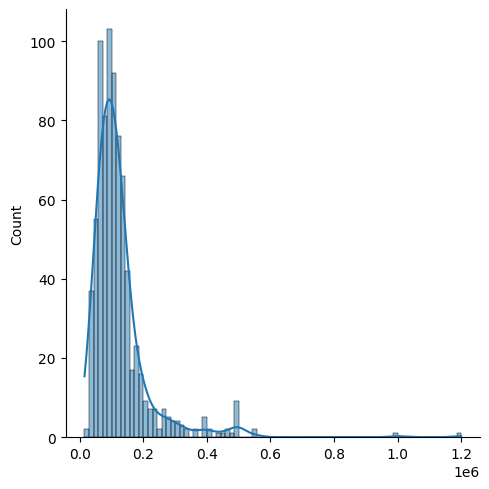

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
arr = train_ft["수치2"].to_numpy()
sns.displot(arr,kde=True)
plt.show()

## StandardScaler 클래스
- 각 Feature별로 평균과 표준편차를 이용하여 평균을 0, 분산이 1인 데이터로 Scaling

In [ ]:
arr.shape # 1차원

(787,)

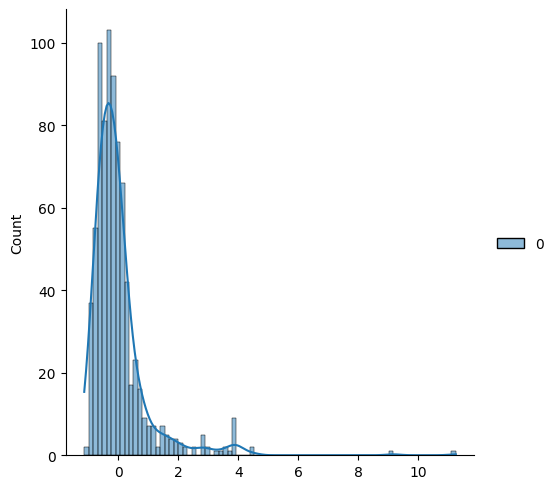

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
tmp = scaler.fit_transform(arr.reshape(-1,1)) # 2D 형태로 넣어줘야함

sns.displot(tmp,kde=True)
plt.show()

- 평균을 0, 분산이 1인 데이터로 Scaling 한다.

In [ ]:
tmp.mean() , tmp.var()

(-1.8056994555529866e-17, 1.0)

- 복원하기

In [ ]:
scaler.inverse_transform(tmp)[:5]

array([[110000.],
       [ 68000.],
       [130000.],
       [146000.],
       [ 76000.]])

## MinMaxScaler 클래스
- 각 Feature별로 최소값과 최대값을 이용하여 최소값은 0, 최대값은 1인 데이터로 Scaling

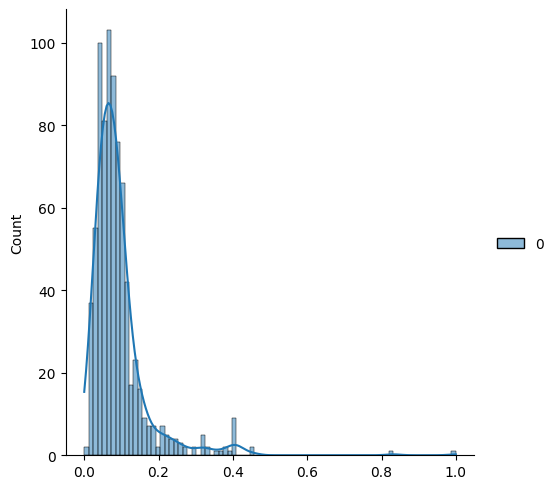

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
tmp = scaler.fit_transform(arr.reshape(-1,1))

sns.displot(tmp,kde=True)
plt.show()

- 최소값은 0, 최대값은 1인 데이터로 Scaling 한다.

In [ ]:
tmp.min() , tmp.max()

(0.0, 1.0)

- 복원하기

In [ ]:
scaler.inverse_transform(tmp)[:5]

array([[110000.],
       [ 68000.],
       [130000.],
       [146000.],
       [ 76000.]])

## PowerTransformer 클래스
- 거듭제곱 변환을 적용하여 데이터를 정규분포와 유사하게 변환

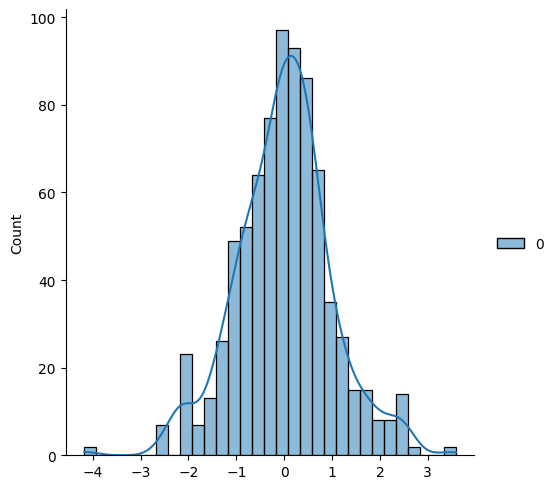

In [ ]:
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer()
tmp = scaler.fit_transform(arr.reshape(-1,1))

sns.displot(tmp,kde=True)
plt.show()

- 평균을 0, 분산이 1인 데이터로 Scaling 한다.

In [ ]:
tmp.mean() , tmp.var()

(1.3231262760564508e-14, 1.0)

- 복원하기

In [ ]:
scaler.inverse_transform(tmp)[:5]

array([[110000.],
       [ 68000.],
       [130000.],
       [146000.],
       [ 76000.]])

## RobustScaler 클래스
- 평균과 표준편차 대신에 중앙값과 사분위수 범위(IQR)를 이용하여 Scaling

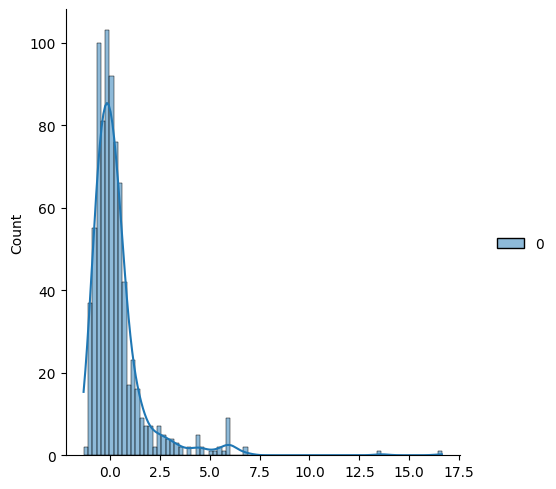

In [ ]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
tmp = scaler.fit_transform(arr.reshape(-1,1))

sns.displot(tmp,kde=True)
plt.show()

- 복원하기

In [ ]:
scaler.inverse_transform(tmp)[:5]

array([[110000.],
       [ 68000.],
       [130000.],
       [146000.],
       [ 76000.]])

- Scaler 별 auc 점수 확인해보기

In [ ]:
# cv 객체 생성
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
cv = StratifiedKFold(n_splits=5,shuffle=True, random_state=42)
model = LogisticRegression(random_state=42)

In [ ]:
scaler = StandardScaler()
x_train = scaler.fit_transform(train_ft)
scores = cross_val_score(model,x_train,target,cv = cv ,scoring='roc_auc',n_jobs = -1)
np.mean(scores)

0.6699292754736303

In [ ]:
scaler = MinMaxScaler()
x_train = scaler.fit_transform(train_ft)
scores = cross_val_score(model,x_train,target,cv = cv ,scoring='roc_auc',n_jobs = -1)
np.mean(scores)

0.6441276241679468

In [ ]:
scaler = PowerTransformer()
x_train = scaler.fit_transform(train_ft)
scores = cross_val_score(model,x_train,target,cv = cv ,scoring='roc_auc',n_jobs = -1)
np.mean(scores)

0.6794786866359447

In [ ]:
scaler = RobustScaler()
x_train = scaler.fit_transform(train_ft)
scores = cross_val_score(model,x_train,target,cv = cv ,scoring='roc_auc',n_jobs = -1)
np.mean(scores)

0.6740335381464414

- 학습및 테스트 데이터 scaling

In [ ]:
scaler = StandardScaler()
train_ft = pd.DataFrame(
    scaler.fit_transform(train_ft),
    columns = train_ft.columns
)
train_ft.head()

,수치1,수치2,수치3,수치4,수치5,연체횟수유형1_sum,변제횟수,연체횟수유형2_sum,연체횟수유형3_sum,총연체일수_sum,...,범주5_5,범주5_7,범주5_8,범주5_9,범주5_10,범주6_1,범주6_2,범주6_3,범주6_4,범주6_5
0,0.297792,-0.146451,-1.736783,-0.674910,-1.167157,-0.352721,-0.539071,-0.273237,-0.229661,-0.203125,...,0.810458,-0.050475,-0.094733,-0.495230,-0.071474,-0.071474,-0.035669,1.760386,-0.628801,-0.934778
1,0.260820,-0.585684,0.938885,1.188064,0.493007,-0.352721,-0.705770,-0.273237,-0.229661,-0.203125,...,-1.233870,-0.050475,-0.094733,-0.495230,-0.071474,-0.071474,-0.035669,-0.568057,-0.628801,1.069773
2,0.425515,0.062708,-1.235095,-0.675216,0.234556,-0.352721,-0.372372,-0.273237,-0.229661,-0.203125,...,-1.233870,-0.050475,-0.094733,-0.495230,-0.071474,-0.071474,-0.035669,-0.568057,1.590330,-0.934778
3,0.442321,0.230035,-0.900637,1.254571,-1.167157,-0.154865,0.461123,0.344688,0.011759,-0.115318,...,0.810458,-0.050475,-0.094733,-0.495230,-0.071474,-0.071474,-0.035669,1.760386,-0.628801,-0.934778
4,-2.479620,-0.502021,1.022499,-0.674730,0.237177,-0.352721,-0.705770,-0.273237,-0.229661,-0.203125,...,-1.233870,-0.050475,-0.094733,2.019262,-0.071474,-0.071474,-0.035669,-0.568057,1.590330,-0.934778


In [ ]:
# 테스트 데이터
test_ft = pd.DataFrame(
    scaler.transform(test_ft),
    columns = test_ft.columns
)
test_ft.head()

,수치1,수치2,수치3,수치4,수치5,연체횟수유형1_sum,변제횟수,연체횟수유형2_sum,연체횟수유형3_sum,총연체일수_sum,...,범주5_5,범주5_7,범주5_8,범주5_9,범주5_10,범주6_1,범주6_2,범주6_3,범주6_4,범주6_5
0,0.580127,0.292782,-1.402324,-0.675296,0.369194,-0.352721,-0.038974,-0.273237,-0.229661,-0.203125,...,0.810458,-0.050475,-0.094733,-0.49523,-0.071474,-0.071474,-0.035669,-0.568057,-0.628801,1.069773
1,-2.479620,-0.313778,1.022499,-0.674956,0.551474,-0.154865,-0.372372,-0.273237,-0.229661,-0.202986,...,0.810458,-0.050475,-0.094733,-0.49523,-0.071474,-0.071474,-0.035669,-0.568057,1.590330,-0.934778
2,0.307876,-0.700721,-0.482564,-0.067765,0.369194,-0.352721,-0.205673,-0.273237,-0.229661,-0.203125,...,0.810458,-0.050475,-0.094733,-0.49523,-0.071474,-0.071474,-0.035669,-0.568057,-0.628801,1.069773
3,-2.479620,-0.543852,0.688041,-0.675209,0.336001,-0.352721,-0.872470,-0.273237,-0.229661,-0.203125,...,0.810458,-0.050475,-0.094733,-0.49523,-0.071474,-0.071474,-0.035669,1.760386,-0.628801,-0.934778
4,-2.479620,-0.261488,-0.900637,-0.675096,0.501782,-0.352721,-0.872470,-0.273237,-0.229661,-0.203125,...,0.810458,-0.050475,-0.094733,-0.49523,-0.071474,-0.071474,-0.035669,1.760386,-0.628801,-0.934778


In [ ]:
train_ft.shape , test_ft.shape

((787, 57), (338, 57))

# Feature Selection
- 전체 Features를 사용하지 않고 중요한 Feature들을 선택해서 학습


## SelectFromModel 클래스
- 모델의 Features 중요도 또는 가중치를 기반으로 Features를 선택하는 방법


In [ ]:
model = LogisticRegression(random_state=42) # 학습 모델

In [ ]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier # Features selection 하기 위한 모델

- Features 중요도로 셀렉션 해보기

In [ ]:
select = SelectFromModel(RandomForestClassifier(random_state=42)) # 모델 객체를 넣는다.
x_train = select.fit_transform(train_ft,target)
scores = cross_val_score(model,x_train,target,cv = cv ,scoring='roc_auc',n_jobs = -1)
np.mean(scores)

0.6970270097286226

- 선택된 피쳐 확인해보기

In [ ]:
select.get_feature_names_out()

array(['수치1', '수치2', '수치3', '수치4', '수치5', '연체횟수유형1_sum', '변제횟수',
       '총연체일수_sum', '정상결제횟수_sum', '정상결제횟수_mean', '정상결제횟수_std',
       '카드코드_nunique', '카드한도_mean', '카드한도_std', '카드현재잔액_mean',
       '카드현재잔액_std', '카드최고잔액_mean', '카드최고잔액_std', '변제횟수_총연체일수_sum'],
      dtype=object)

In [ ]:
select.get_feature_names_out().shape

(19,)

- Features 가중치로 셀렉션 해보기

In [ ]:
select = SelectFromModel(LogisticRegression(random_state=42)) # 모델 객체를 넣는다.
x_train = select.fit_transform(train_ft,target)
scores = cross_val_score(model,x_train,target,cv = cv ,scoring='roc_auc',n_jobs = -1)
np.mean(scores)

0.728350614439324

- 선택된 피쳐 확인해보기

In [ ]:
select.get_feature_names_out()

array(['수치2', '변제횟수', '연체횟수유형3_sum', '총연체일수_sum', '정상결제횟수_mean',
       '카드코드_nunique', '카드한도_std', '카드현재잔액_std', '카드최고잔액_mean',
       '카드최고잔액_std', '변제횟수_총연체일수_sum', '범주2_1', '범주4_12', '범주4_16',
       '범주5_4', '범주5_7', '범주5_10'], dtype=object)

In [ ]:
select.get_feature_names_out().shape

(17,)

## SelectKBest, SelectPercentile 클래스
- 각 Feature와 Target 사이에 유의한 통계적 관계가 있는지 계산하여 Features를 선택하는 방법
- SelectKBest
    - k개의 가장 유의한 통계적 관계가 있는 피쳐를 선택
- SelectPercentile
    - 백분위수에 따라 가장 유의한 통계적 관계가 있는 피쳐를 선택

In [ ]:
from sklearn.feature_selection import SelectKBest
select = SelectKBest(k=30)  # 상위 30개 피쳐 선택
x_train = select.fit_transform(train_ft,target)
scores = cross_val_score(model,x_train,target,cv = cv ,scoring='roc_auc',n_jobs = -1)
np.mean(scores)

0.6990767409114184

In [ ]:
from sklearn.feature_selection import SelectPercentile
select = SelectPercentile(percentile=20) # 상위 20% 피쳐 선택
x_train = select.fit_transform(train_ft,target)
scores = cross_val_score(model,x_train,target,cv = cv ,scoring='roc_auc',n_jobs = -1)
np.mean(scores)

0.7144057219662059

In [ ]:
select.get_feature_names_out()

array(['수치2', '변제횟수', '정상결제횟수_sum', '정상결제횟수_mean', '정상결제횟수_std',
       '카드한도_mean', '카드한도_std', '카드현재잔액_mean', '카드현재잔액_std',
       '카드최고잔액_mean', '변제횟수_총연체일수_sum', '범주2_1'], dtype=object)

# 테스트 데이터 예측하기

- 특성 선택

In [ ]:
select = SelectFromModel(LogisticRegression(random_state=42)) # 모델 객체를 넣는다.
select.fit(train_ft,target)
cols = select.get_feature_names_out() # 선택된 피쳐
cols

array(['수치2', '변제횟수', '연체횟수유형3_sum', '총연체일수_sum', '정상결제횟수_mean',
       '카드코드_nunique', '카드한도_std', '카드현재잔액_std', '카드최고잔액_mean',
       '카드최고잔액_std', '변제횟수_총연체일수_sum', '범주2_1', '범주4_12', '범주4_16',
       '범주5_4', '범주5_7', '범주5_10'], dtype=object)

- 학습데이터 전체 학습

In [ ]:
model = LogisticRegression(random_state=42)
model.fit(train_ft[cols],target)

LogisticRegression(random_state=42)

- 테스트 데이터 예측

In [ ]:
pred = model.predict_proba(test_ft[cols])[:,1] # 예측
pred

array([8.14801719e-02, 2.17687370e-01, 1.02075630e-01, 2.52077142e-01,
       2.17636709e-01, 3.66594637e-01, 4.23712780e-02, 1.95395927e-01,
       7.24385858e-02, 1.80906601e-01, 2.58504040e-01, 1.45150532e-01,
       2.24628217e-01, 4.06478370e-01, 4.71612920e-03, 2.27138188e-01,
       1.50966032e-01, 2.36508618e-02, 3.93948924e-01, 3.12388367e-01,
       2.87342414e-01, 4.52793657e-01, 1.73651964e-01, 3.53602523e-01,
       1.84714269e-01, 1.50633484e-01, 5.27144691e-02, 3.67248779e-01,
       3.42515163e-04, 1.56686977e-01, 1.46649697e-02, 4.07032515e-02,
       3.89109561e-01, 7.23619493e-02, 1.50855177e-01, 1.10296201e-01,
       4.01973388e-01, 3.49849858e-01, 1.02480525e-01, 3.50595108e-02,
       3.85676892e-01, 2.76631270e-01, 2.59310402e-01, 1.20281894e-01,
       2.73243769e-01, 4.12680092e-01, 1.34809140e-01, 9.73525347e-02,
       6.02250227e-02, 3.12553531e-01, 9.08768200e-02, 2.86895150e-01,
       2.03581876e-01, 1.93515106e-01, 2.46820147e-01, 2.63519816e-01,
      